In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


In [6]:
path='ObesityDataSet_raw_and_data_sinthetic.csv'
obesidad = pd.read_csv(path)
print(obesidad.info())

obesidad.describe()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
ob = obesidad.groupby(["Gender", "family_history_with_overweight"]).agg( Cantidad=('Gender', 'count'))
ob['Porcentaje(%)'] = (ob['Cantidad'] / ob['Cantidad'].groupby("Gender").sum()) * 100
ob

Cantidad  Porcentaje(%)
Gender family_history_with_overweight                         
Female no                                   232      22.243528
       yes                                  811      77.756472
Male   no                                   153      14.325843
       yes                                  915      85.674157

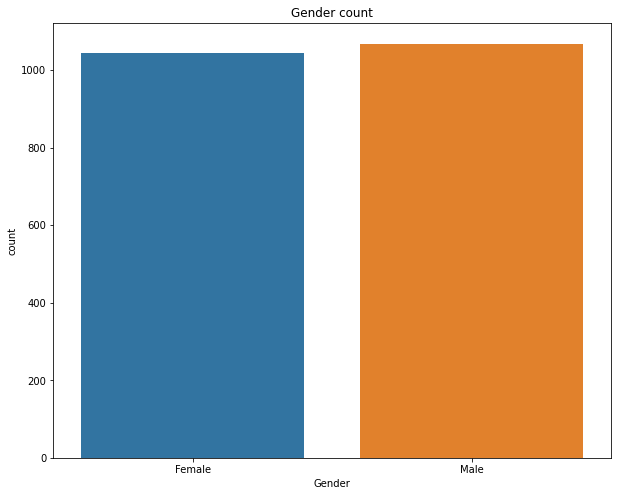

In [8]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='Gender',data=obesidad)
plt.title("Gender count")
plt.show()

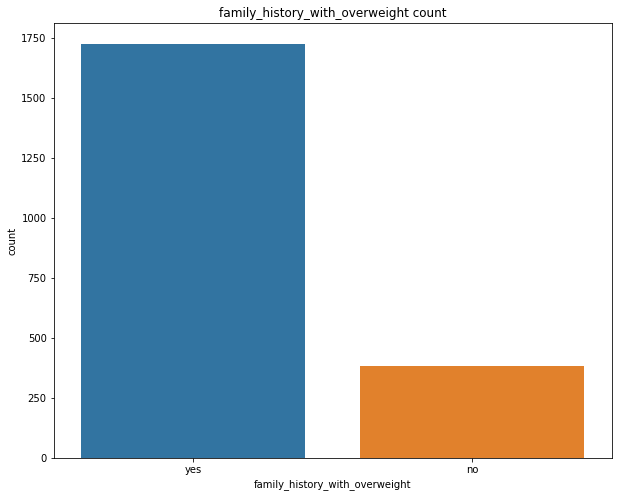

In [9]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='family_history_with_overweight',data=obesidad)
plt.title("family_history_with_overweight count")
plt.show()

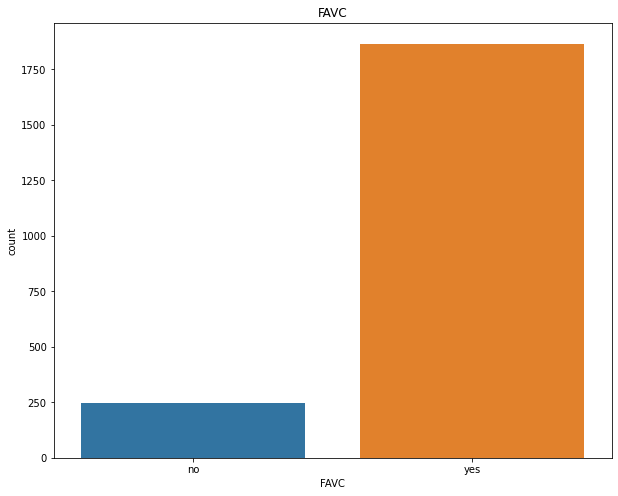

In [10]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='FAVC',data=obesidad)
plt.title("FAVC")
plt.show()

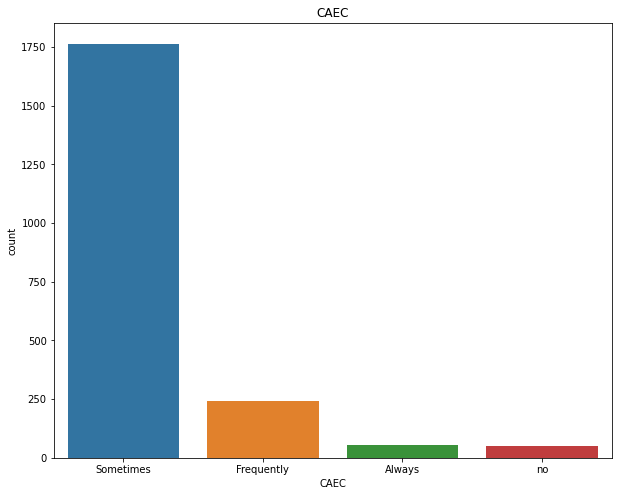

In [11]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='CAEC',data=obesidad)
plt.title("CAEC")
plt.show()

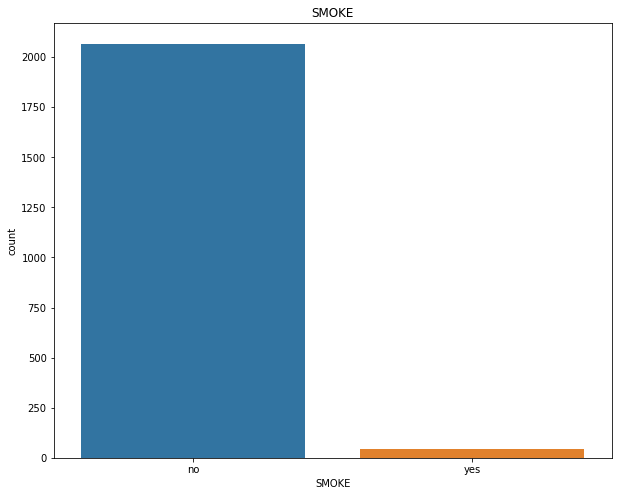

In [12]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='SMOKE',data=obesidad)
plt.title("SMOKE")
plt.show()

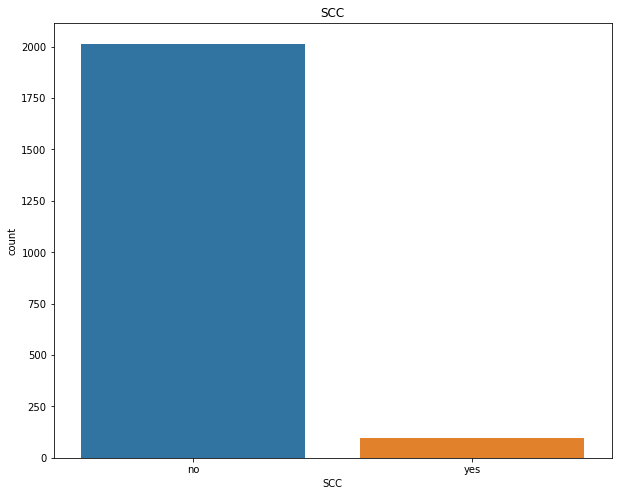

In [13]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='SCC',data=obesidad)
plt.title("SCC")
plt.show()

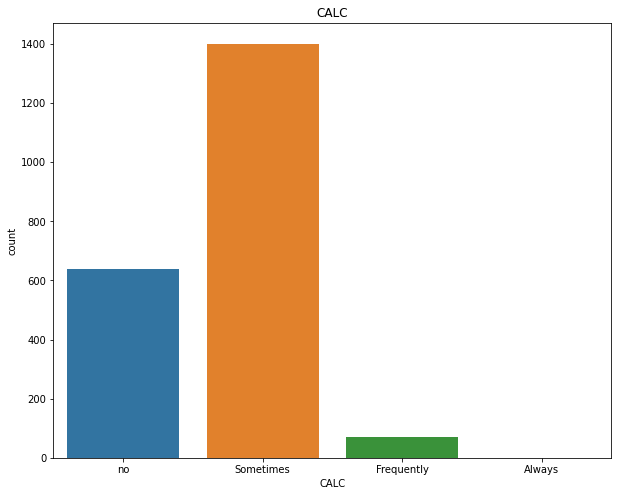

In [14]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='CALC',data=obesidad)
plt.title("CALC")
plt.show()

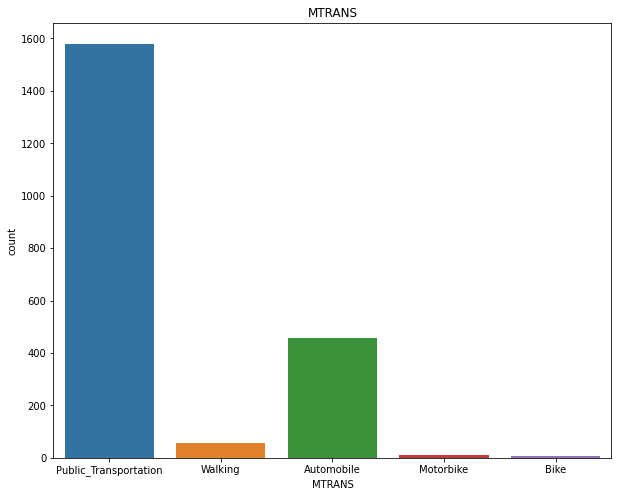

In [15]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='MTRANS',data=obesidad)
plt.title("MTRANS")
plt.show()

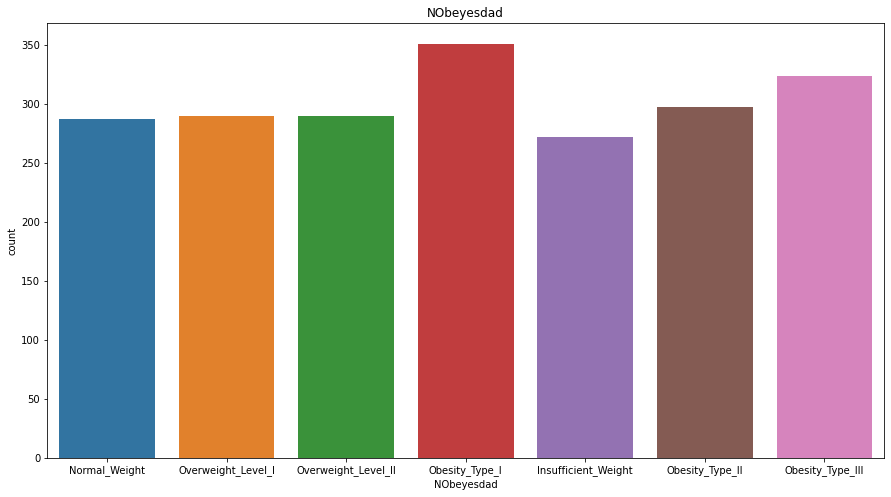

In [16]:
ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='NObeyesdad',data=obesidad)
plt.title("NObeyesdad")
plt.show()

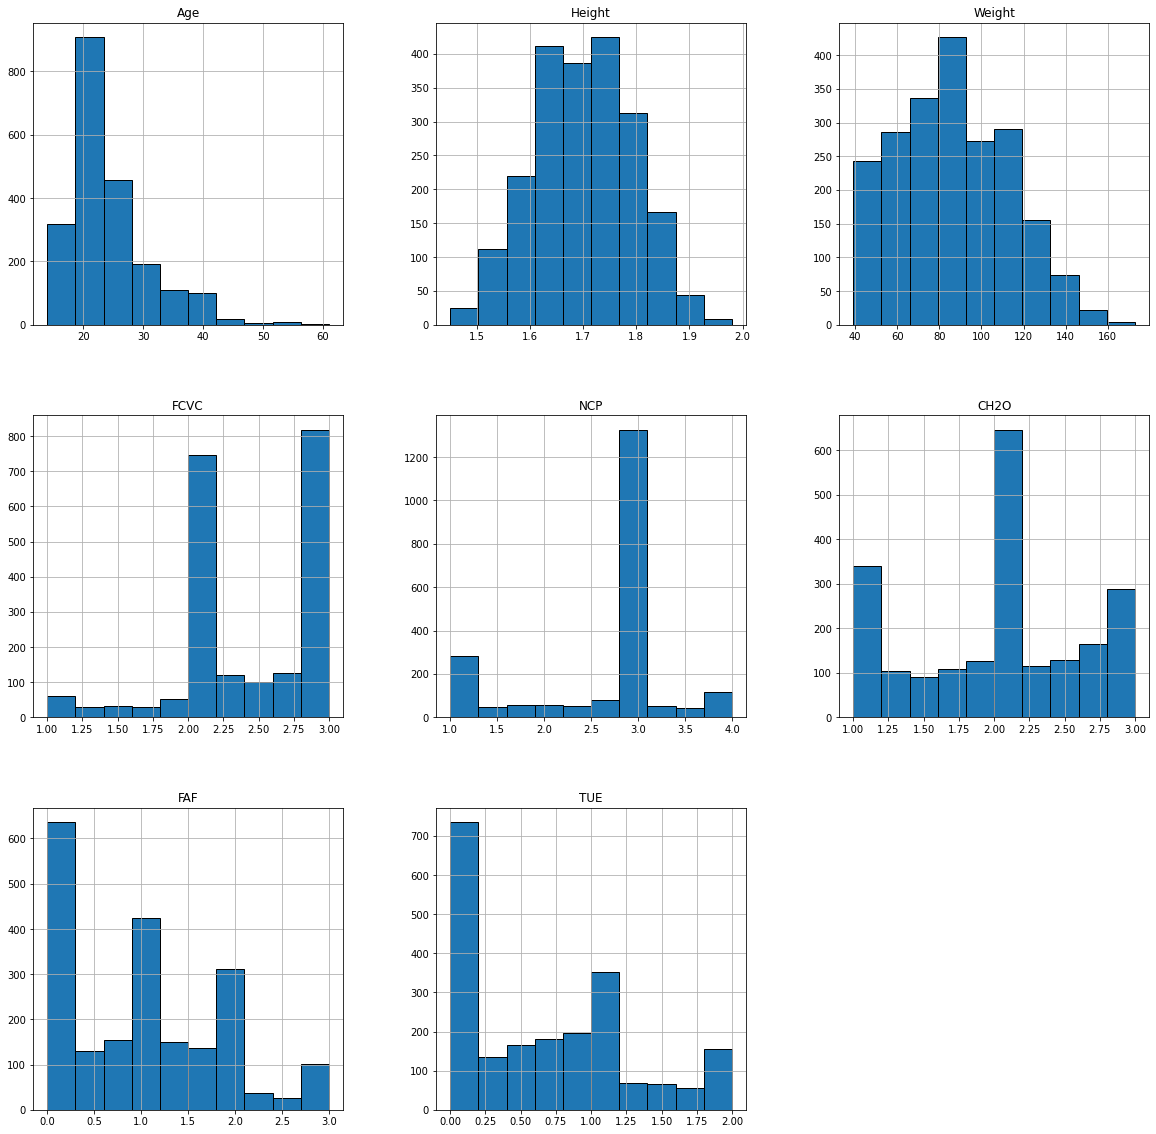

In [17]:
obesidad.hist(edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


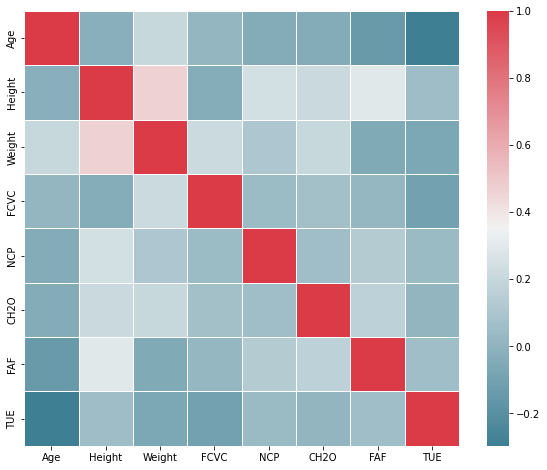

In [18]:
X = obesidad.iloc[:, 0:17]
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
print(corr)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5)
plt.show() 

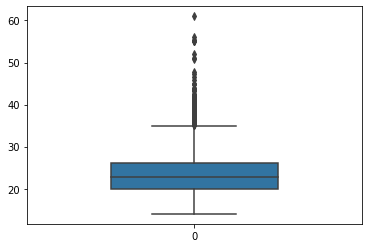

In [19]:
box_data = obesidad.Age #variable representing the data array
box_target = obesidad.Age #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
plt.show()

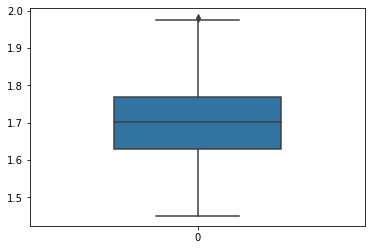

In [20]:
box_data = obesidad.Height #variable representing the data array
box_target = obesidad.Height #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
plt.show()

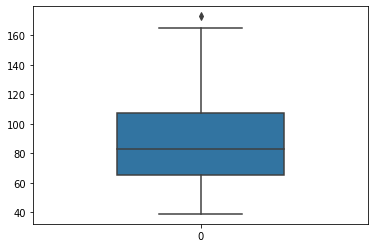

In [21]:
box_data = obesidad.Weight #variable representing the data array
box_target = obesidad.Weight #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
plt.show()

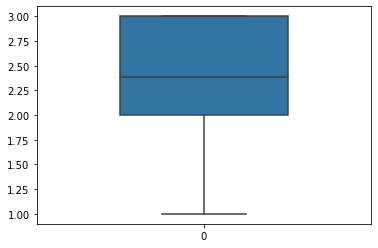

In [22]:
box_data = obesidad.FCVC #variable representing the data array
box_target = obesidad.FCVC #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
plt.show()

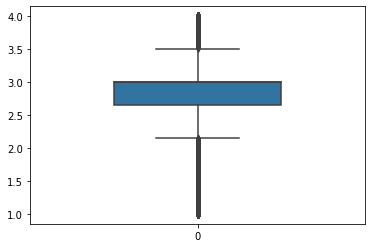

In [23]:
box_data = obesidad.NCP #variable representing the data array
box_target = obesidad.NCP #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
plt.show()

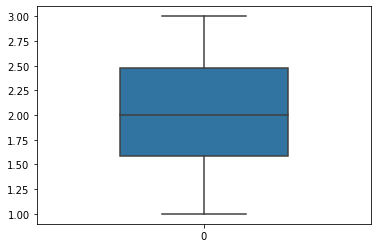

In [24]:
box_data = obesidad.CH2O #variable representing the data array
box_target = obesidad.CH2O #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
plt.show()

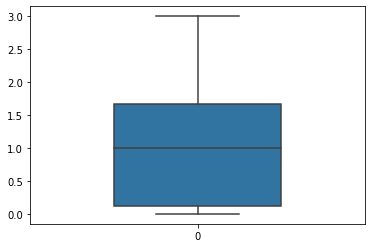

In [25]:
box_data = obesidad.FAF #variable representing the data array
box_target = obesidad.FAF #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
plt.show()

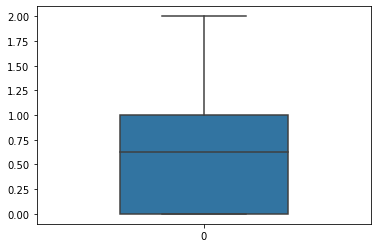

In [26]:
box_data = obesidad.TUE #variable representing the data array
box_target = obesidad.TUE #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
plt.show()

Transformacion de los datos

In [27]:
dGender = {'Male' : 0, 'Female' : 1}
dYESandNO = {'no' : 0, 'yes' : 1}
dFrequency = {'no' : 0, 'Sometimes' : 1, 'Frequently': 2, 'Always': 3}
dMT = {'Public_Transportation' : 0, 'Walking' : 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4}
dLABELS = {'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3,
        'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6}
obesidad['Gender'] = obesidad['Gender'].map(dGender)

obesidad['family_history_with_overweight'] = obesidad['family_history_with_overweight'].map(dYESandNO)
obesidad['FAVC'] = obesidad['FAVC'].map(dYESandNO)
obesidad['SMOKE'] = obesidad['SMOKE'].map(dYESandNO)
obesidad['SCC'] = obesidad['SCC'].map(dYESandNO)
obesidad['CAEC'] = obesidad['CAEC'].map(dFrequency)
obesidad['CALC'] = obesidad['CALC'].map(dFrequency)
obesidad['MTRANS'] = obesidad['MTRANS'].map(dMT)
obesidad['NObeyesdad'] = obesidad['NObeyesdad'].map(dLABELS)

obesidad.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,3


Separación de las variables predictoras y las variables a predecir

In [28]:
X = obesidad.iloc[:, 0:16]
y=obesidad.NObeyesdad
print(y)
print(obesidad)

0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: int64
      Gender        Age    Height      Weight  family_history_with_overweight  \
0          1  21.000000  1.620000   64.000000                               1   
1          1  21.000000  1.520000   56.000000                               1   
2          0  23.000000  1.800000   77.000000                               1   
3          0  27.000000  1.800000   87.000000                               0   
4          0  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       1  20.976842  1.710730  131.408528                               1   
2107       1  21.982942  1.748584  133.742943                               1   
2108       1  22.524036  1.752206  133.689352                               1   
2109       1  24.361936  1.739450  

In [29]:
X.isnull().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

Conjuntos de prueba y de entrenamiento

In [30]:
ytarget = obesidad['NObeyesdad']
xdata = obesidad.drop(['NObeyesdad'], axis=1)

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)


DECISION TREE

In [31]:
DTClassifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=20)
DTClassifier = DTClassifier.fit(Xtrain,Ytrain)

#Evaluación en el conjunto de prueba
yPred = DTClassifier.predict(Xtest)

print('Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: {:.2f}'.format(DTClassifier.score(Xtest, Ytest))) 
cmatrix = confusion_matrix(Ytest, yPred)
print(cmatrix)

print(classification_report(Ytest, yPred))
print(xdata.columns)

Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: 0.95
[[ 80   2   0   0   0   0   0]
 [  1  77   2   1   0   0   0]
 [  0   3  83   2   0   0   0]
 [  0   0   6  79   4   0   0]
 [  0   0   0   4 109   2   0]
 [  0   0   0   1   3  93   0]
 [  0   0   0   0   0   0  82]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        82
           1       0.94      0.95      0.94        81
           2       0.91      0.94      0.93        88
           3       0.91      0.89      0.90        89
           4       0.94      0.95      0.94       115
           5       0.98      0.96      0.97        97
           6       1.00      1.00      1.00        82

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC

RANDOM FOREST

In [32]:
RFClassifier = RandomForestClassifier(n_estimators=50, max_depth=20)
RFClassifier.fit(Xtrain, Ytrain)
yPred = RFClassifier.predict(Xtest)
print('Accuracy de RandomForestClassifier sobre el conjunto de prueba es: {:.2f}'.format(RFClassifier.score(Xtest, Ytest))) 
cmatrix = confusion_matrix(Ytest, yPred)
print(cmatrix)

print(classification_report(Ytest, yPred))
print(xdata.columns)

Accuracy de RandomForestClassifier sobre el conjunto de prueba es: 0.94
[[ 78   4   0   0   0   0   0]
 [  1  77   3   0   0   0   0]
 [  0  11  76   1   0   0   0]
 [  0   8   3  78   0   0   0]
 [  0   3   3   2 107   0   0]
 [  0   1   0   0   1  95   0]
 [  0   0   0   0   0   0  82]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        82
           1       0.74      0.95      0.83        81
           2       0.89      0.86      0.88        88
           3       0.96      0.88      0.92        89
           4       0.99      0.93      0.96       115
           5       1.00      0.98      0.99        97
           6       1.00      1.00      1.00        82

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC

Redes Neuronales

Perceptron Multicapas

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.optimizers import SGD

In [34]:
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
model = MLPClassifier(hidden_layer_sizes= (17,), alpha=0.01, max_iter= 1000)
model.fit(Xtrain,Ytrain)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(17,), max_iter=1000)

In [35]:
prediccion = model.predict(Xtest)
print(accuracy_score(Ytest,prediccion))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Ytest, prediccion))

0.862776025236593
Confusion matrix:
[[78  4  0  0  0  0  0]
 [13 55 11  2  0  0  0]
 [ 0  4 72 10  2  0  0]
 [ 0  4 10 67  8  0  0]
 [ 0  0  4 10 98  3  0]
 [ 0  0  0  1  1 95  0]
 [ 0  0  0  0  0  0 82]]


Keras

In [46]:
XtrainK, XvalidK, YtrainK, YvalidK = train_test_split(X, y, random_state=42)
print("Los datos de entrenamiento contienen %d registros " % (len(XtrainK)))

print("Los datos de prueba contienen %d registros " % (len(XvalidK)))

Los datos de entrenamiento contienen 1583 registros 
Los datos de prueba contienen 528 registros 


In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(80, activation="relu", input_shape = Xtrain.shape[1:]),
    keras.layers.Dense(80, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])
history = model.fit(XtrainK, YtrainK, epochs=100, validation_data=(XvalidK, YvalidK))

accu_test = model.evaluate(Xtest, Ytest)
print('accuracy con datos de prueba is {}'.format(accu_test))
#print(accuracy_score(Ytest,history))


Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 3.7171e-07 - accuracy: 0.1320 - val_loss: 3.6892e-07 - val_accuracy: 0.1477
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 3.7171e-07 - accuracy: 0.1320 - val_loss: 3.6892e-07 - val_accuracy: 0.1477
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 3.7171e-07 - accuracy: 0.1320 - val_loss: 3.6892e-07 - val_accuracy: 0.1477
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 3.7171e-07 - accuracy: 0.1320 - val_loss: 3.6892e-07 - val_accuracy: 0.1477
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 3.7171e-07 - accuracy: 0.1320 - val_loss: 3.6892e-07 - val_accuracy: 0.1477
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 3.7171e-07 - accuracy: 0.1320 - val_loss: 3.6892e-07 - val_accuracy: 0.1477
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 3.7171e-07 - accuracy: 0.1320 - v